<h1> <center> 2 - Members </center> </h1> 

**Author:** Sebastião Rosalino, nº 20230372

**Supervisors:** Flávio Pinheiro, António Curado

<div style="text-align: center;">
    <img src="../logos/nova_ims_logo.png" alt="Image 1" style="width: 15%; display: inline-block; margin: 0 10px;"/>
    <img src="../logos/european_parliament_logo.png" alt="Image 2" style="width: 15%; display: inline-block; margin: 0 10px;"/>
</div>

# Table of Contents

1. [Exporting Dataset](#Exporting-Dataset)

In [1]:
# Import the necessary libraries and configurations
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the members dataset
members = pd.read_csv('../datasets/first_stage/members.csv')

In [3]:
# Check the shape (number of rows and number of features) of the members dataset
print(f'members number of rows: {members.shape[0]}')
print(f'members number of features: {members.shape[1]}')

members number of rows: 873
members number of features: 8


In [4]:
# Check the structural information of the members dataset, including column names, non-null counts, datatypes and size
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             873 non-null    int64 
 1   first_name     873 non-null    object
 2   last_name      873 non-null    object
 3   country_code   873 non-null    object
 4   date_of_birth  790 non-null    object
 5   email          704 non-null    object
 6   facebook       478 non-null    object
 7   twitter        482 non-null    object
dtypes: int64(1), object(7)
memory usage: 54.7+ KB


In [5]:
# Check for duplicated rows in the members dataset
duplicates = members.duplicated()

# Display the count of duplicated rows
print(f"Number of duplicated rows in members: {duplicates.sum()}")

Number of duplicated rows in members: 0


In [6]:
# Visualize the members dataset
members

,id,first_name,last_name,country_code,date_of_birth,email,facebook,twitter
0,840,Charles,GOERENS,LUX,1952-02-06,charles.goerens@europarl.europa.eu,https://www.facebook.com/charles.goerens,https://twitter.com/CharlesGoerens
1,1394,Bill,NEWTON DUNN,GBR,NaN,NaN,NaN,NaN
2,1854,Constanze,KREHL,DEU,1956-10-14,NaN,NaN,NaN
3,1892,Carlos,COELHO,PRT,1960-05-20,carlos.coelho@europarl.europa.eu,https://www.facebook.com/carloscoelhopt/,http://twitter.com/CarlosCoelhoPT
4,1909,Bernd,LANGE,DEU,1955-11-14,bernd.lange@europarl.europa.eu,https://www.facebook.com/bernd.lange.europa/,https://twitter.com/berndlange
...,...,...,...,...,...,...,...,...
868,254719,Vasco,BECKER-WEINBERG,PRT,1979-09-21,vasco.becker-weinberg@europarl.europa.eu,NaN,NaN
869,254720,Ana Miguel,DOS SANTOS,PRT,1981-09-12,anamiguel.dossantos@europarl.europa.eu,NaN,NaN
870,254721,Vânia,NETO,PRT,1979-04-25,vania.neto@europarl.europa.eu,NaN,NaN
871,254722,Teófilo,SANTOS,PRT,1951-02-12,teofilo.santos@europarl.europa.eu,NaN,NaN


In [7]:
# Create a mapping between old 'id' and new 'id_mep'
id_mep_mapping = dict(zip(members['id'], range(len(members))))

# Add the new column 'id_mep' with IDs starting from 0
members['id_mep'] = range(len(members))

# Drop the old 'id' column
members.drop(columns=['id'], inplace=True)

# Preview the results
members

,first_name,last_name,country_code,date_of_birth,email,facebook,twitter,id_mep
0,Charles,GOERENS,LUX,1952-02-06,charles.goerens@europarl.europa.eu,https://www.facebook.com/charles.goerens,https://twitter.com/CharlesGoerens,0
1,Bill,NEWTON DUNN,GBR,NaN,NaN,NaN,NaN,1
2,Constanze,KREHL,DEU,1956-10-14,NaN,NaN,NaN,2
3,Carlos,COELHO,PRT,1960-05-20,carlos.coelho@europarl.europa.eu,https://www.facebook.com/carloscoelhopt/,http://twitter.com/CarlosCoelhoPT,3
4,Bernd,LANGE,DEU,1955-11-14,bernd.lange@europarl.europa.eu,https://www.facebook.com/bernd.lange.europa/,https://twitter.com/berndlange,4
...,...,...,...,...,...,...,...,...
868,Vasco,BECKER-WEINBERG,PRT,1979-09-21,vasco.becker-weinberg@europarl.europa.eu,NaN,NaN,868
869,Ana Miguel,DOS SANTOS,PRT,1981-09-12,anamiguel.dossantos@europarl.europa.eu,NaN,NaN,869
870,Vânia,NETO,PRT,1979-04-25,vania.neto@europarl.europa.eu,NaN,NaN,870
871,Teófilo,SANTOS,PRT,1951-02-12,teofilo.santos@europarl.europa.eu,NaN,NaN,871


In [8]:
# Convert date_of_birth to datetime format
members['date_of_birth'] = pd.to_datetime(members['date_of_birth'], errors='coerce')

In [9]:
# Extract all MEPs where 'date_of_birth' is missing
missing_dob = members[members['date_of_birth'].isna()]

# Display only the first and last names of these MEPs
missing_dob_names = missing_dob[['first_name', 'last_name']]

# Temporarily display all rows
with pd.option_context('display.max_rows', None):
     print(missing_dob_names)

           first_name              last_name
1                Bill            NEWTON DUNN
18       María Soraya        RODRÍGUEZ RAMOS
22             Claude                 MORAES
24              Neena                   GILL
39             András                  GYÜRK
51              Kinga                    GÁL
52           Margrete                  AUKEN
55             Markus                 PIEPER
89        Adina-Ioana                 VĂLEAN
92              Georg                  MAYER
102            Victor               NEGRESCU
114            Morten             LØKKEGAARD
137      Tomasz Piotr                 PORĘBA
147              Jens                  GEIER
151          Cornelia                  ERNST
153    Maria da Graça               CARVALHO
168            Sylvie              GUILLAUME
189            Anthea               McINTYRE
214              Dita             CHARANZOVÁ
235             Marco                  ZANNI
249           Dietmar                 KÖSTER
251       

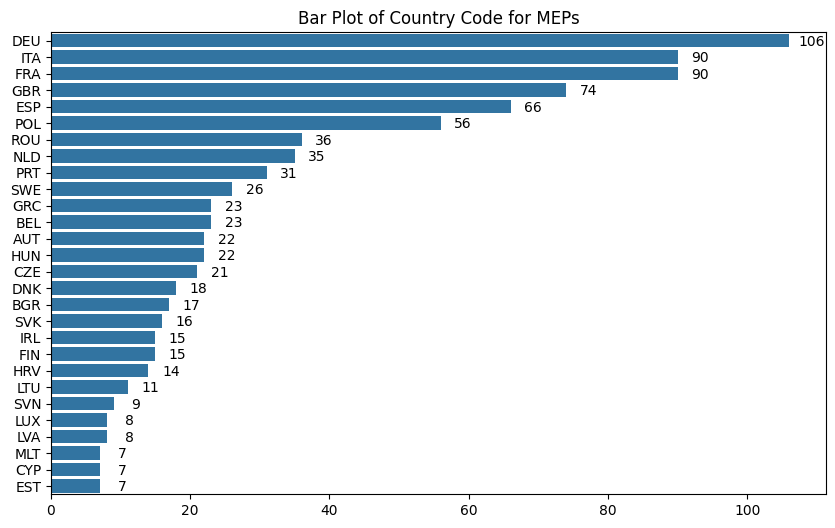

In [10]:
# Plotting the horizontal bar plot for country_code sorted in descending order
plt.figure(figsize=(10, 6))
country_code_order = members['country_code'].value_counts().index
ax = sns.countplot(data=members, y='country_code', order=country_code_order)
plt.title('Bar Plot of Country Code for MEPs')
plt.xlabel('')
plt.ylabel('')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 5, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', fontsize=10, color='black', xytext=(-9, -1), 
                textcoords='offset points')

plt.show()

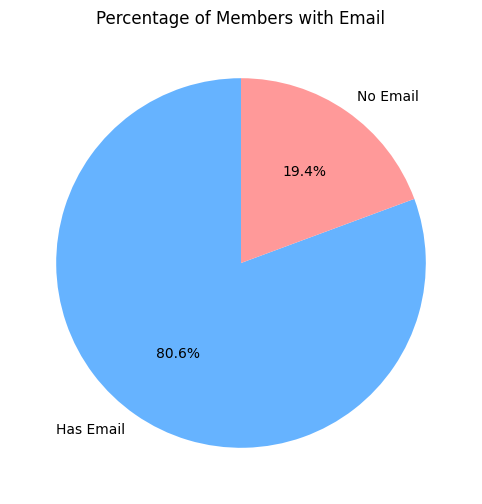

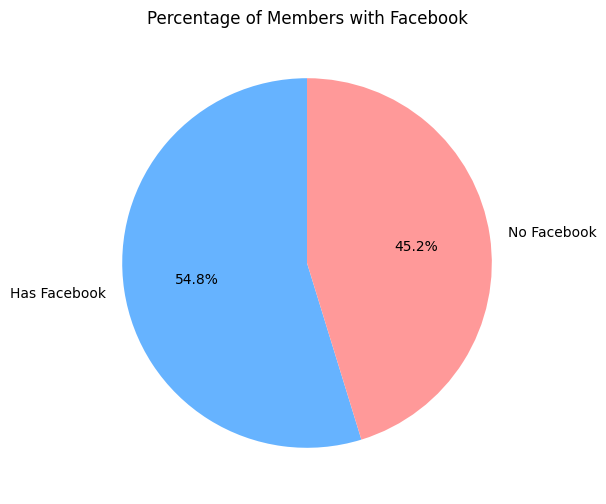

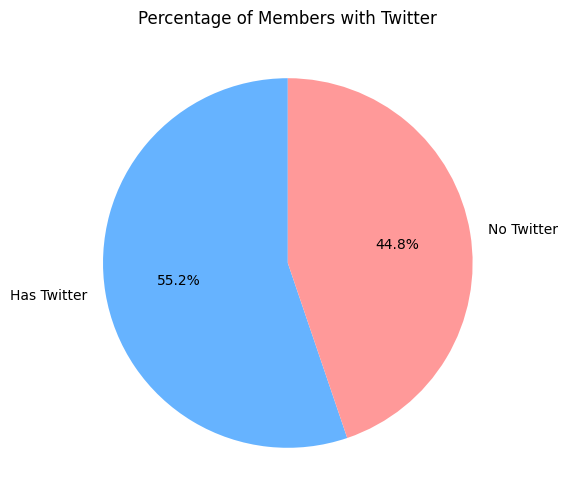

In [11]:
# Function to create the pie charts demonstrating the use of social media across MEPs
def plot_pie_chart(column, title):
    counts = members[column].notna().value_counts()
    labels = ['Has ' + column.capitalize(), 'No ' + column.capitalize()]
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    plt.title(title)
    plt.show()

# Plotting pie charts
plot_pie_chart('email', 'Percentage of Members with Email')
plot_pie_chart('facebook', 'Percentage of Members with Facebook')
plot_pie_chart('twitter', 'Percentage of Members with Twitter')

In [12]:
# Drop the columns "email", "facebook", "twitter", 'date_of_birth' as they are irrelevant
members.drop(["email", "facebook", "twitter", 'date_of_birth'], axis=1, inplace=True)

In [13]:
# Merge the first_name and last_name columns into a single column 'name'
members['name'] = members['first_name'] + " " + members['last_name']

# Drop the original first_name and last_name columns since they are no longer needed
members = members.drop(columns=['first_name', 'last_name'])

In [14]:
# Visualize the resulting dataset
members

,country_code,id_mep,name
0,LUX,0,Charles GOERENS
1,GBR,1,Bill NEWTON DUNN
2,DEU,2,Constanze KREHL
3,PRT,3,Carlos COELHO
4,DEU,4,Bernd LANGE
...,...,...,...
868,PRT,868,Vasco BECKER-WEINBERG
869,PRT,869,Ana Miguel DOS SANTOS
870,PRT,870,Vânia NETO
871,PRT,871,Teófilo SANTOS


## 1. Exporting Dataset
<a id="Exporting-Dataset"></a>

In [15]:
# Export the members dataset in its current stage to the corresponding local folder
members.to_csv("../datasets/second_stage/2_members/members.csv", index=False)

# Save the id_mep_mapping variable for later use
with open('../datasets/second_stage/2_members/id_mep_mapping.pkl', 'wb') as f:
    pickle.dump(id_mep_mapping, f)